# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Fatikha Hudi Aryani
- **Email:** fatikhahudiaryani621@gmail.com
- **ID Dicoding:** fatikha_hudi_aryani

## Menentukan Pertanyaan Bisnis

1. Produk apa yang paling populer berdasarkan jumlah pesanan, dan kategori produk mana yang memberikan kontribusi terbesar terhadap pendapatan?
2. Kapan terakhir pelanggan melakukan transaksi?
3. Seberapa sering customers melakukan pembelian produk dalam beberapa bulan terakhir?
4. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?
5. Bagaimana penilaian (rating) yang diberikan oleh customers terhadap E-Commerce?

## Import Semua Packages/Library yang Digunakan

In [695]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

## Data Wrangling

### Gathering Data

**1) Tabel Data customers_df**

In [696]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/Fatikhaaa/proyek-analisis-data-Dicoding/refs/heads/main/data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**2) Tabel Data geolocation_df**

In [697]:
geolocation_df = pd.read_csv("https://raw.githubusercontent.com/Fatikhaaa/proyek-analisis-data-Dicoding/refs/heads/main/data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**3) Tabel Data orders_df**

In [698]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/Fatikhaaa/proyek-analisis-data-Dicoding/refs/heads/main/data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**4) Tabel Data order_payments_df**

In [699]:
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/Fatikhaaa/proyek-analisis-data-Dicoding/refs/heads/main/data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**5) Tabel Data order_reviews_df**

In [700]:
order_reviews_df = pd.read_csv("https://raw.githubusercontent.com/Fatikhaaa/proyek-analisis-data-Dicoding/refs/heads/main/data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**6) Tabel Data orders_df**

In [701]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/Fatikhaaa/proyek-analisis-data-Dicoding/refs/heads/main/data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**7) Tabel Data product_category_df**

In [702]:
product_category_df = pd.read_csv("https://raw.githubusercontent.com/Fatikhaaa/proyek-analisis-data-Dicoding/refs/heads/main/data/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**8) Tabel Data products_df**

In [703]:
products_df = pd.read_csv("https://raw.githubusercontent.com/Fatikhaaa/proyek-analisis-data-Dicoding/refs/heads/main/data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**9) Tabel Data sellers_df**

In [704]:
sellers_df = pd.read_csv("https://raw.githubusercontent.com/Fatikhaaa/proyek-analisis-data-Dicoding/refs/heads/main/data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Tahapan gathering dilakukan untuk mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan bisnis yang telah dirumuskan.
- Function read_csv() digunakan untuk membaca atau mengakses data berkas CSV menjadi sebuah DataFrame dan function head() adalah perintah untuk menampilkan 5 baris pertama dari dataFrame.
- Jadi dapat diketahui bahwa E-Commerce Public Dataset merupakan kumpulan data pesanan E-Commerce yang terdiri dari 9 tabel antara lain customer_df, geolocation_df, order_items_df, order_payments_df, order_reviews_df, orders_df, product_category_df, products_df, dan sellers_df.

### Assessing Data

**1) Data customers_df**

In [705]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Berdasarkan hasil outputnya, terlihat bahwa jumlah data sudah sesuai dan tidak ada tipe data yang salah

In [706]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


Berdasarkan outputnya, data tersebut tidak ada missing value (nilai yang hilang)

In [707]:
print("Jumlah duplikasi data: ", customers_df.duplicated().sum())

Jumlah duplikasi data:  0


Data tersebut terlihat tidak ada data yang terduplikasi

In [708]:
customers_df.describe(include=('all'))

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Berdasrkan hasil outputnya, data tersebut tidak ditemukan keanehan berdasarkan statistik deskriptif

**2) Data geolocation_df**

In [709]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Berdasarkan hasil outputnya, terlihat bahwa jumlah data sudah sesuai dan tidak ada tipe data yang salah

In [710]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


Berdasarkan outputnya, data tersebut tidak ada missing value

In [711]:
print("Jumlah duplikasi Data: ", geolocation_df.duplicated().sum())

Jumlah duplikasi Data:  261831


Data tersebut terlihat adanya data yang terduplikasi sejumlah 261.831

In [712]:
geolocation_df.describe(include=('all'))

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


Berdasarkan hasil outputnya, data tersebut tidak ditemukan keanehan berdasarkan statistik deskriptif

**3) Data order_items_df**

In [713]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Berdasarkan hasil outputnya, terlihat bahwa terdapat tipe data yang tidak sesuai pada kolom **shipping_limit_date** dimana seharusnya bertipe **datetime** bukan **object**

In [714]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


Berdasarkan outputnya, data tersebut tidak ada missing value

In [715]:
print("Jumlah duplikasi data: ", order_items_df.duplicated().sum())

Jumlah duplikasi data:  0


Data tersebut terlihat tidak ada data yang terduplikasi

In [716]:
order_items_df.describe(include=('all'))

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Berdasarkan hasil outputnya, data tersebut tidak ditemukan keanehan berdasarkan statistik **deskriptif**

**4) Data order_payments_df**

In [717]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Berdasarkan hasil outputnya, terlihat bahwa jumlah data sudah sesuai dan tidak ada tipe data yang salah

In [718]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


Berdasarkan outputnya, data tersebut tidak ada missing value

In [719]:
print("Jumlah duplikasi data: ", order_payments_df.duplicated().sum())

Jumlah duplikasi data:  0


Data tersebut terlihat tidak ada data yang terduplikasi

In [720]:
order_payments_df.describe(include=('all'))

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Berdasrkan hasil outputnya, data tersebut tidak ditemukan keanehan berdasarkan statistik deskriptif

**5) Data order_reviews_df**

In [721]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Berdasarkan hasil outputnya, terlihat bahwa adanya perbedaan jumlah data pada kolom **review_comment_title** dan **review_comment_message** dengan jumlah data pada kolom lainnya. Serta terdapat kesalahan tipe data pada kolom **review_creation_date** dan **review_answer_timestamp** yang seharusnya direpresentasikan dengan tipe data datetime bukan object

In [722]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Berdasarkan outputnya, data tersebut ditemukan missing value pada kolom review_commment_title sejumlah 87.656 dan review_comment_message sejumlah 58.247.

In [723]:
print("Jumlah duplikasi data: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi data:  0


Data tersebut terlihat tidak ada data yang terduplikasi

In [724]:
order_reviews_df.describe(include=('all'))

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


Berdasrkan hasil outputnya, data tersebut tidak ditemukan keanehan berdasarkan statistik deskriptif

**6) Data orders_df**

In [725]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Berdasarkan hasil outputnya, terlihat bahwa terdapat jumlah data yang tidak sesuai yaitu pada kolom **order_approved_at**, **order_delivered_carrier_date**, dan **order_delivered_customer_date**. Selain itu, ditemukan adanya kesalahan tipe data pada kolom **order_delivered_carrier_date**, **order_delivered_customer_date**, dan **order_estimated_delivery_date** yang seharusnya direpresentasikan dengan tipe data datetime bukan object.

In [726]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Berdasarkan outputnya, data tersebut ditemukan adanya missing value pada kolom **order_approved_at** sejumlah 160, **order_delivered_carrier_date** sejumlah 1.783, dan **order_delivered_customer_date** sejumlah 2.965

In [727]:
print("Jumlah duplikasi data: ", orders_df.duplicated().sum())

Jumlah duplikasi data:  0


Data tersebut terlihat tidak ada data yang terduplikasi

In [728]:
orders_df.describe(include=('all'))

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Berdasarkan hasil outputnya, data tersebut tidak ditemukan keanehan berdasarkan statistik deskriptif

**7) Data product_category_df**

In [729]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Berdasarkan hasil outputnya, terlihat bahwa jumlah data sudah sesuai dan tidak ada tipe data yang salah

In [730]:
product_category_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


Berdasarkan outputnya, data tersebut tidak ada missing value (nilai yang hilang)

In [731]:
print("Jumlah duplikasi data: ", product_category_df.duplicated().sum())

Jumlah duplikasi data:  0


Data tersebut terlihat tidak ada data yang terduplikasi

In [732]:
product_category_df.describe(include=('all'))

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Berdasarkan hasil outputnya, data tersebut tidak ditemukan keanehan berdasarkan statistik deskriptif

**8) Data products_df**

In [733]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Berdasarkan hasil outputnya, terlihat bahwa terdapat perbedaan jumlah data pada kolom sehingga menandakan jumlah data tidak sesuai. Selain itu, tidak ditemukan adanya tipe data yang salah

In [734]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Berdasarkan outputnya, data tersebut terdapat missing value pada kolom product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty sejumlah 610, sedangkan pada kolom product_weight_g,
product_length_cm,
product_height_cm,dan
product_width_cm sejumlah 2

In [735]:
print("Jumlah duplikasi data: ", products_df.duplicated().sum())

Jumlah duplikasi data:  0


Data tersebut terlihat tidak ada data yang terduplikasi

In [736]:
products_df.describe(include=('all'))

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Berdasarkan hasil outputnya, data tersebut tidak ditemukan keanehan berdasarkan statistik deskriptif

**9) Data sellers_df**

In [737]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Berdasarkan hasil outputnya, terlihat bahwa jumlah data sudah sesuai dan tidak ada tipe data yang salah

In [738]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


Berdasarkan outputnya, data tersebut tidak ada missing value.

In [739]:
print("Jumlah duplikasi data: ", sellers_df.duplicated().sum())

Jumlah duplikasi data:  0


Data tersebut terlihat tidak ada data yang terduplikasi

In [740]:
sellers_df.describe(include=('all'))

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Berdasarkan hasil outputnya, data tersebut tidak ditemukan keanehan berdasarkan statistik deskriptif

**Insight:**
- Tahap Assessing Data merupakan tahapan proses yang bertujuan guna mengidentifikasi masalah yang terdapat dalam data dan memastikan data berkualitas.
- Setiap DataFrame akan diperiksa informasinya dengan menggunakan function info(), memeriksa apakah terdapat bagian data yang kosong dengan menggunakan function isna(), dan memeriksa apakah terdapat duplikasi data dengan menggunakan function duplicates().

### Cleaning Data

**1) Pembersihan Data order_reviews_df**

> **Missing Value**

Dari tahapan sebelumnya ditemukan adanya missing value maka perlu dilakukan perbaikan. Untuk menentukan metode mana yang akan digunakan, saya menggunakan teknik filtering untuk melihat data yang mengandung missing value tersebut.



In [741]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga tidak perlu dropping. Oleh karena itu, pada kasus ini, saya akan menggunakan metode imputation untuk menangani missing value. Dimana dengan menggunakan nilai tertentu untuk mengganti missing value. Pada kolom review_comment_title termasuk kolom kategorik, maka saya akan menggunakan method value_counts()untuk mengidentifikasi persebaran nilai yang dominan.


In [742]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


Terlihat nilai yang paling dominan dalam kolom review_comment_title adalah “Recomendo”. Namun dalam kasus ini karena jumlah missing value sangat banyak maka saya menggunakan pendekatan terbaik dengan mengisi dengan nilai default yang netral dengan value "sem comentários" yang berarti tidak ada komentar. Hal ini untuk menjaga data tetap konsisten tanpa memaksakan asumsi yang tidak akurat. Sehingga nilai tersebut yang selanjutnya akan digunakan sebagai pengganti missing value dengan menggunakan method fillna()

In [743]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


Dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga tidak perlu dropping. Oleh karena itu, pada kasus ini, saya akan menggunakan metode imputation untuk menangani missing value. Dimana dengan menggunakan nilai tertentu untuk mengganti missing value. Pada kolom review_comment_message termasuk kolom kategorik, maka saya akan menggunakan method value_counts()untuk mengidentifikasi persebaran nilai yang dominan.

In [744]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


Diatas terlihat nilai yang paling dominan dalam kolom review_comment_message adalah “Muito Bom”. Namun dalam kasus ini karena jumlah missing value sangat banyak maka saya menggunakan pendekatan terbaik dengan mengisi dengan nilai default yang netral dengan value "sem comentários" yang berarti tidak ada komentar. Hal ini untuk menjaga data tetap konsisten tanpa memaksakan asumsi yang tidak akurat. Sehingga nilai tersebut yang selanjutnya akan digunakan sebagai pengganti missing value dengan menggunakan method fillna()

In [745]:
order_reviews_df.fillna(value="sem comentários", inplace=True)

In [746]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


Terlihat bahwa sudah tidak ada lagi missing value pada kolom review_comment_title dan review_comment_message sehingga menandakan permasalahan teratasi

> **Tipe Data**

  Mengganti tipe data object menjadi datetime pada kolom review_creation_date dan review_answer_timestamp

In [747]:
datetime_or = ["review_creation_date","review_answer_timestamp"]

for column in datetime_or:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [748]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**2) Pembersihan Data geolocation_df**

Dari hasil tahap assessing data yang telah dilakukan sebelumnya, ditemukan bahwa terdapat data yang duplikat pada geolocation_df, namun setelah dianalisa data tersebut tidak perlu dilakukan dropping (hapus data) karena data pada kolom geolocation_state dan geolocation_city merupakan data geografis yang mana dalam satu negara bagian dapat memiliki banyak kota, atau kota yang sama dapat muncul berulang kali dalam konteks yang berbeda.Oleh karena itu, duplikasi ini tidak perlu dihapus, karena setiap entri merepresentasikan lokasi unik yang relevan dengan analisis data geografis.

**3) Pembersihan Data order_items_df**



> **Tipe Data**

Melakukan perbaikan untuk mengganti tipe data yang tidak sesuai dengan tipe data yang baru

In [749]:
datetime_oi = ["shipping_limit_date"]

for column in datetime_oi:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

Mengganti tipe data pada kolom shipping_limit_date menjadi datetime

In [750]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**4) Pembersihan Data orders_df**

> **Tipe Data**


Mengganti tipe data pada kolom "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date" yang sebelumnya object menjadi datetime

In [751]:
datetime_od = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_od:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [752]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**5) Pembersihan Data products_df**


> **Missing Value**

Dari tahapan sebelumnya ditemukan adanya missing value maka perlu dilakukan perbaikan. Untuk menentukan metode mana yang akan digunakan, saya menggunakan teknik filtering untuk melihat data yang mengandung missing value tersebut.

In [753]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Pada kolom product_category_name terdapat banyak missing value dan merupakan kolom kategorik, maka saya akan menggunakan method value_counts()untuk mengidentifikasi persebaran nilai yang dominan.

In [754]:
products_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


Terlihat nilai yang paling dominan dalam kolom product_category_name adalah “cama_mesa_banho”. Namun dalam kasus ini karena jumlah missing value sangat banyak maka saya menggunakan pendekatan terbaik dengan mengisi dengan nilai default yang netral dengan value "others" yang berarti produk lain. Hal ini untuk menjaga data tetap konsisten tanpa memaksakan asumsi yang tidak akurat. Sehingga nilai tersebut yang selanjutnya akan digunakan sebagai pengganti missing value dengan menggunakan method fillna()

In [755]:
products_df.product_category_name.fillna(value="others", inplace=True)

<ipython-input-755-6f11672b6aca>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_category_name.fillna(value="others", inplace=True)


Pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm terdapat masing-masing 2 missing value. Data ini akan dihapus/dropping. Sedangkan, kolom product_name_length dan producs_description_length juga tidak terlalu digunakan dalam menjawab pertanyaan bisnis jadi dua kolom tersebut akan dilakukan dropping juga.

In [756]:
products_df.dropna(subset=["product_name_lenght", "product_description_lenght", "product_height_cm", "product_width_cm"], inplace=True)

Untuk missing value pada kolom product_photos_qty akan diasumsikan bahwa produk tidak memiliki foto sehingga akan diisikan value 0.

In [757]:
products_df.fillna(value={"product_photos_qty": 0}, inplace=True)

In [758]:
# Memeriksa kembali missing value data products_df
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


## Exploratory Data Analysis (EDA)

###1) Explore Data customers_df

In [759]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [760]:
customers_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
36413,d0bd0b10b6696336a0cf1df6a25ba21d,c29d36febfa766ca995aee6ac0526abd,51021,recife,PE
58587,610fec793d32685ac025e21dc3aaae71,f2993a5e8702bb0803b0dd4a0ea6613a,5750,sao paulo,SP
51450,eb136264e351f7e90ae306bdbbdbb44d,f818b5035d2d61b52b779c512947f1fa,8752,mogi das cruzes,SP
51435,fc64d36cb6c7a53dff087efa3651d2ef,b137ce1f077eee065753b578e9e27904,32678,betim,MG
88258,2f326df8bae20dc643eecaba92d0778b,1267212283399f8294c491fec2b02be9,9812,sao bernardo do campo,SP
51418,742cedd54dad5e81da2cdaf719678e3d,ddbead72efcebad74eb7e952b034e995,8717,mogi das cruzes,SP
93740,c46757e9d12534dc8e5e6ab555cb5c9b,d3d6c0dd8cd8e4c2b17b402adf4252a1,17212,jau,SP
43893,319c850f33954b0d3911b7317282b335,76de6c90299164750e98433eae294dea,12224,sao jose dos campos,SP
34073,90e62e6099a2dad9ded0f79af4e9f980,c9db667c614c73789033408b41813cea,8330,sao paulo,SP
60593,a1117ae24c0d94be1e8346ec32cc0bc4,03995411f78a2383cdc47c966be72c4c,80240,curitiba,PR


In [761]:
# Mengelompokkan data berdasarkan kolom 'customer_city',
# lalu menghitung jumlah customer_id unik di setiap kota
# Hasil perhitungan diurutkan secara descending (jumlah pelanggan terbanyak ke paling sedikit)
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [762]:
# Mengelompokkan data berdasarkan kolom 'customer_state',
# lalu menghitung jumlah customer_id unik di setiap negara bagian.
# Hasil perhitungan diurutkan secara descending (jumlah pelanggan terbanyak ke paling sedikit).
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Dapat diketahui bahwa customer paling banyak berada di kota Sao Paulo dan di negara bagian SP

In [763]:
customer_id_in_orders_df = orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
23631,1894aac94fa1486d7b60e6a429bf31fb,787a5c4e16118ce0267bb67520cf8179,91260,porto alegre,RS,Active
18576,7397ea54948b521f7b64b333fe2558b2,d27b1b5fc7ded2556005c1839b68db3c,21710,rio de janeiro,RJ,Active
14923,c0dc8d5e93ca20f45aec8b7355e2b50b,fe80881541b7cb0a0732cf82eed3c82b,24931,marica,RJ,Active
37788,72c925898f3e64e0f05014dfc6dd3072,262c924976402a1e7bee227038057e51,75800,jatai,GO,Active
5358,00660e817a39486a37c26b071d0741f8,587547bf360f33a6466aac68caecdde3,8010,sao paulo,SP,Active


In [764]:
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,99441


Terlihat bahwa seluruh customer merupakan pelanggan aktif

###2) Explore Data order_payment_df

In [765]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [766]:
order_payments_df.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
980,60622e02fde39a42fe9654c41a6bba8d,1,debit_card,1,191.28
72912,4f26458e3155ac93aa479a6d3ab6f909,1,boleto,1,42.42
83807,c84b383da1173fe2b3b8dc1052c66821,1,boleto,1,32.77
38546,84c6aab1664b33eb5607e118dc4bced8,1,credit_card,3,57.30
40585,f68bf4a4d690be2a9ba9402b0862ad34,1,credit_card,1,166.68
79403,91ba8089d2fac808ba2eebac6c8c8819,1,credit_card,1,47.44
21219,0268c75309d105bb28b7523f57f46a69,1,credit_card,3,222.61
64793,f5406ee32e8586e5a8834586c65c4187,1,credit_card,1,75.85
53,1ffb3c1929b16d9c1aec1958e11b3e9b,1,boleto,1,166.04
46998,ba4ca9935a3de9d4a25569f1ff9368e9,1,boleto,1,108.72


In [767]:
# Mengelompokkan data berdasarkan kolom 'payment_type'
# Menghitung jumlah kemunculan setiap tipe pembayaran
# Mengurutkan hasil secara descending untuk melihat persebaran tipe pembayaran
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


Dapat diketahui bahwa tipe pembayaran yang paling banyak dilakukan dengan menggunakan credit card

###3) Explore Data order_reviews_df

In [768]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36159,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,sem comentários,sem comentários,NaN,NaN
freq,3,3,NaN,87656,58248,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [769]:
order_reviews_df.sample(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
22995,0b3f4e2e9f63f05eab04d64f02a81be0,13f4bad08354705fbeb23f41f08c31c4,1,sem comentários,"ALÉM DE RECEBER O PRODUTO ERRADO,VEIO DENTRO D...",2017-09-29,2017-09-30 17:44:07
59599,f508806e6d1d8b65f09b1f050e3c9276,2783cfcf916c2cef168f19a7a2e45e45,5,Super recomendo,................,2018-07-31,2018-07-31 18:53:49
37447,ae99f6bff4b7400c50f08ff0536969e2,6c187a778a170f2bc6beac3979e3a81c,4,sem comentários,sem comentários,2018-04-15,2018-04-17 15:55:30
11231,e417599cf87a7539535a72bc29ff87ba,bdd374a843bda6af81c48e0680622729,2,sem comentários,Não recebi porque está no correio,2017-10-01,2017-10-02 02:20:44
5479,63afae1a32dcb5bf563449f9367a186f,08427834d148946950a3fe92a596e1e4,5,sem comentários,sem comentários,2017-12-12,2017-12-15 09:40:40
57406,1e02c708b5da6f983c5d4b46ddd3331c,a52c52c656d3b3ef3ec72fcdc13c714f,4,sem comentários,Produto de fácil montagem e de acordo com as e...,2018-05-03,2018-05-05 22:41:45
69645,e960337bbc2e45ec94e5d1cd8bab6a14,f3dfda8fe064d227cee42eb21b73cc69,5,sem comentários,sem comentários,2018-06-26,2018-06-26 21:26:34
78223,072591c37f8ec8cd9d5e75d3e4f2351a,30a022caf1ba5b86f28124ed216c859f,4,sem comentários,sem comentários,2018-03-21,2018-03-22 00:33:42
27151,3a1135a4c5d067cfc9c831403e5e948c,6a8eb263ce16a204a4531e80e9bc83c9,5,sem comentários,sem comentários,2018-08-15,2018-08-15 18:15:43
79096,9c59610eebf21c57aae7ce4a4a753a77,51bfdb83aacf1064814782f7109c6365,5,sem comentários,sem comentários,2018-07-25,2018-07-26 12:06:39


In [770]:
# Mengelompokkan data berdasarkan kolom 'review_score'
# Menghitung jumlah kemunculan setiap peringkat ulasan
# Mengurutkan hasil secara descending untuk melihat persebaran review score
order_reviews_df.groupby(by="review_score").review_id.nunique().sort_values(ascending=False)

,review_id
review_score,
5,56910
4,19007
1,11282
3,8097
2,3114


Peringkat ulasan yang paling sering diberikan dari customer yaitu 5 yang berarti customer puas

###4) Explore Data orders_df

In [771]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [772]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
37148,9fdbb4e3852125934395217722756d93,28e7c43216a6d55d260c3fd9fd7f663c,delivered,2017-09-29 23:56:20,2017-09-30 00:24:51,2017-10-02 18:32:51,2017-10-09 20:03:48,2017-10-25
93875,fe89167e2ec9e9b03d0a6f28a2987381,b171f4d6134c0cc013a5c892e658e43f,delivered,2017-12-02 09:53:13,2017-12-02 10:18:29,2017-12-04 17:56:37,2017-12-11 20:14:54,2017-12-29
70065,16e59b28d489ea6bc1f2f9a7057740d4,25efef823626e7fa4e74f0bc9db133d1,delivered,2018-06-10 13:54:25,2018-06-11 16:20:19,2018-06-13 13:04:00,2018-07-04 11:32:34,2018-07-12
50121,4ef36d7c9950e291544d3a68d123992c,34c59bf3d0944d2887ee2987c2eda500,delivered,2017-06-23 18:17:05,2017-06-23 18:30:13,2017-06-26 13:43:42,2017-07-03 16:49:54,2017-07-21
36580,65b8cbd6d0ad97befea844cc40817ccb,220a1f1adf2be499250db06cd27d0a1e,delivered,2017-05-10 16:48:50,2017-05-10 17:02:49,2017-05-16 08:54:14,2017-05-22 20:26:17,2017-06-02


In [773]:
# Menambahkan kolom baru delivered_on_time akan berisi dua kategori : "On Time" dan "Late"
orders_df["delivered_ontime"] = np.where(orders_df["order_delivered_customer_date"] <= orders_df["order_estimated_delivery_date"], "On Time", "Late")

In [774]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_ontime
36520,6aeec0cf09e8cd90c75cdd0ece396867,84106b0fd15d17c59d5bd961521b443a,delivered,2017-10-08 22:49:59,2017-10-08 23:13:58,2017-10-16 21:14:55,2017-10-24 16:47:57,2017-11-01,On Time
9668,9e631c9b66b8485a8b8a42fce40ed307,dd9061c2a5a1c0283e6a28971e82590b,delivered,2017-02-01 15:42:59,2017-02-02 02:45:16,2017-02-24 06:54:51,2017-03-02 16:22:29,2017-03-06,On Time
39524,1e2e0bd44283a412e965e041198550c2,87990b89093037efada2de89091ecbfe,delivered,2017-03-10 14:02:50,2017-03-10 14:02:50,2017-03-14 13:39:58,2017-04-18 17:11:08,2017-04-12,Late
50754,4da788e62b434b077a87840fe701ddc1,e54e3844cf0843ef99fc1d126b3cfbaa,delivered,2017-09-09 11:36:29,2017-09-09 11:50:13,2017-09-12 12:22:47,2017-09-18 22:16:56,2017-10-03,On Time
80752,139f560e44636d72034722f833c7fdbc,ec3c691f4812ae37bebd0f383a869562,delivered,2017-12-25 12:24:33,2017-12-26 12:16:26,2017-12-26 19:34:58,2018-01-08 22:04:15,2018-01-19,On Time


In [775]:
# Melihat jumlah data orders_df yang dikirimkan tepat waktu dan telat
orders_df.groupby(by="delivered_ontime").order_id.nunique().sort_values(ascending=False)

,order_id
delivered_ontime,
On Time,88649
Late,10792


### Menggabungkan Data orders_df dan customer_df

In [776]:
customers_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_ontime
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time


In [777]:
customers_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


Diketahui bahwa Sao paulo merupakan customer city yang paling banyak melakukan order

In [778]:
customers_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Diketahui bahwa SP adalah state yang paling banyak melakukan order

### Explore Data order_payments_df dan order_reviews_df

In [779]:
# merge antara data order_payments_df dan order_reviews_df
order_payment_reviews_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payment_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,sem comentários,sem comentários,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,sem comentários,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,sem comentários,sem comentários,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,sem comentários,sem comentários,2017-12-21,2017-12-22 01:10:39


In [780]:
order_payment_reviews_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [781]:
# Mengurutkan order dengan biaya jumlah pembayaran tertinggi
order_payment_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,sem comentários,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,sem comentários,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,sem comentários,sem comentários,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,sem comentários,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,sem comentários,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,sem comentários,2018-08-24,2018-08-25 02:24:54


In [782]:
# Melihat informasi order berdasarkan tipe pembayaran
order_payment_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

### Menggabungkan data customers_orders_df dan order_payment_reviews_df

In [783]:
customer_payment_review_df = pd.merge(
    left=customers_orders_df,
    right=order_payment_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customer_payment_review_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,sem comentários,sem comentários,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,sem comentários,sem comentários,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,sem comentários,sem comentários,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,sem comentários,sem comentários,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


### Menggabungkan Data order_items_df dan sellers_df

In [784]:
order_items_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
order_items_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [785]:
# Melihat jumlah data berdasarkan seller_city
order_items_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41


In [786]:
# Melihat seller_state
order_items_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


### Menggabungkan Data products_df dan product_category_df

In [787]:
products_pc_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_pc_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [788]:
# Melihat pengelompokan produk berdasarkan product category name (masih dalam bahasa brazil)
products_pc_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [789]:
# Melihat pengelompokan produk berdasarkan product category name english (setelah diterjemahkan ke english)
products_pc_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


### Menggabungkan Data order_items_seller_df dan products_pc_df

In [790]:
new_sellers_df = pd.merge(
    left=products_pc_df,
    right=order_items_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
new_sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [791]:
# Mengurutkan berdasarkan harga tertinggi
new_sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20259,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
72948,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
48843,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
70869,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
31828,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9220,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,20,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
9215,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,15,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29222,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,6e864b3f0ec71031117ad4cf46b7f2a1,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,38950,ibia,MG
29223,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG


In [792]:
# Melihat pengelompokkan product category name yang sudah diterjemahkan ke english
new_sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Menggabungkan All data

In [793]:
all_data = pd.merge(
    left=customer_payment_review_df,
    right=new_sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [794]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118916 entries, 0 to 118915
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118916 non-null  object        
 1   customer_unique_id             118916 non-null  object        
 2   customer_zip_code_prefix       118916 non-null  int64         
 3   customer_city                  118916 non-null  object        
 4   customer_state                 118916 non-null  object        
 5   status                         118916 non-null  object        
 6   order_id                       118916 non-null  object        
 7   order_status                   118916 non-null  object        
 8   order_purchase_timestamp       118916 non-null  datetime64[ns]
 9   order_approved_at              118739 non-null  datetime64[ns]
 10  order_delivered_carrier_date   116836 non-null  datetime64[ns]
 11  

In [795]:
# Melihat total nilai price dan freight_value berdasarkan pengelompokan customer_city dan product_category_name_english
all_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

In [796]:
# Melihat total pembelian berdasarkan state
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7704995.19
RJ,12852,2789943.31
MG,11635,2348832.08
RS,5466,1150630.26
PR,5045,1078393.10
BA,3380,801658.12
SC,3637,800447.82
GO,2020,519540.42
DF,2140,437836.87


In [797]:
# Melihat data jumlah minimum dan makssimum pembelian produk
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

### Convert all_data ke .csv

In [804]:
# Convert all_data ke .csv
all_data.to_csv("all_data.csv", index=False)

# **Visualization & Explanatory Analysis**

### 1. Produk apa yang paling populer berdasarkan jumlah pesanan, dan kategori produk mana yang memberikan kontribusi terbesar terhadap pendapatan?

In [799]:
sum_order_items_df = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_items_df = sum_order_items_df.rename(columns={"product_id": "products"})
sum_order_items_df = sum_order_items_df.sort_values(by="products", ascending=False)

sum_order_items_df

,product_category_name_english,products
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


Terlihat bahwa produk **bed_bath_table** menjadi produk yang paling populer berdasarkan penjualannya

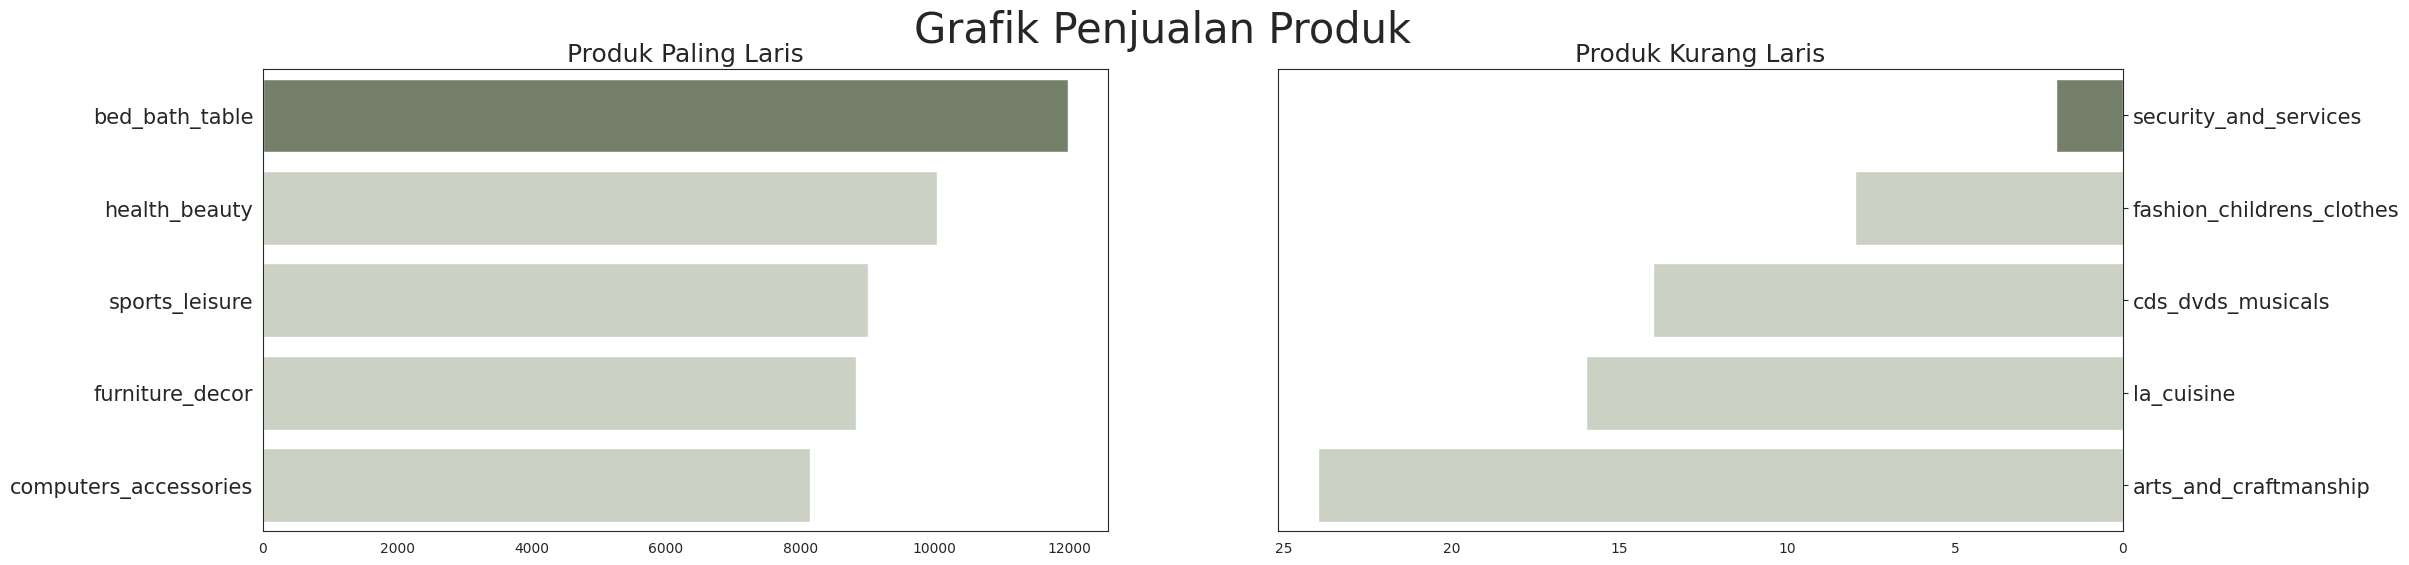

In [800]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#758467", "#CBD5C0", "#CBD5C0", "#CBD5C0", "#CBD5C0"]

sns.barplot(
    x="products",
    y="product_category_name_english",
    data=sum_order_items_df.head(5),
    hue="product_category_name_english",  # Menambahkan hue
    palette=colors,
    ax=ax[0],
    legend=False  # Mematikan legenda
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk Paling Laris", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

sns.barplot(
    x="products",
    y="product_category_name_english",
    data=sum_order_items_df.sort_values(by="products", ascending=True).head(5),
    hue="product_category_name_english",  # Menambahkan hue
    palette=colors,
    ax=ax[1],
    legend=False  # Mematikan legenda
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk Kurang Laris", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Grafik Penjualan Produk", fontsize=30)
plt.show()

Berdasarkan dari grafik di atas, produk yang paling populer atau banyak terjual adalah bed_bath_table dan produk yang paling sedikit terjual adalah security_and_services

### 2.  Kapan terakhir customer melakukan transaksi?
### 3. Seberapa sering customers melakukan pembelian produk dalam beberapa bulan terakhir?
### 4. Berapa jumlah pengeluaran yang dihabiskan customer dalam beberapa bulan terakhir?

Untuk menjawab pertanyaan nomor 2, 3, dan ini dengan menggunakan RFM Analysis, dimana akan dimulai dengan membuat DataFrame baru terlebih dahulu yang memuat informasi ketiga parameter RFM yaitu recency, frequency, dan monetary.
* Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
* Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
*	Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [801]:
rfm = all_data.groupby(by="customer_id", as_index=False).agg({
    "order_approved_at": "max", # Mengambil tanggal order terakhir
    "order_id": "nunique", # Menghitung jumlah order
    "payment_value": "sum" # Menghitung jumlah revenue pembayaran yang dihasilkan
})
rfm.columns = ["customer_id", "order_purchase_timestamp", "frequency", "monetary"]

# Mnghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm["order_purchase_timestamp"] = rfm["order_purchase_timestamp"].dt.date
recent_date = orders_df["order_approved_at"].max()
rfm["recency"] = rfm["order_purchase_timestamp"].apply(lambda x: (recent_date - pd.to_datetime(x)).days)

rfm.drop("order_purchase_timestamp", axis=1, inplace=True)
rfm.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293.0
1,000161a058600d5901f007fab4c27140,1,67.41,414.0
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552.0
3,0002414f95344307404f0ace7a26f1d5,1,179.35,382.0
4,000379cdec625522490c315e70c7a9fb,1,107.01,152.0


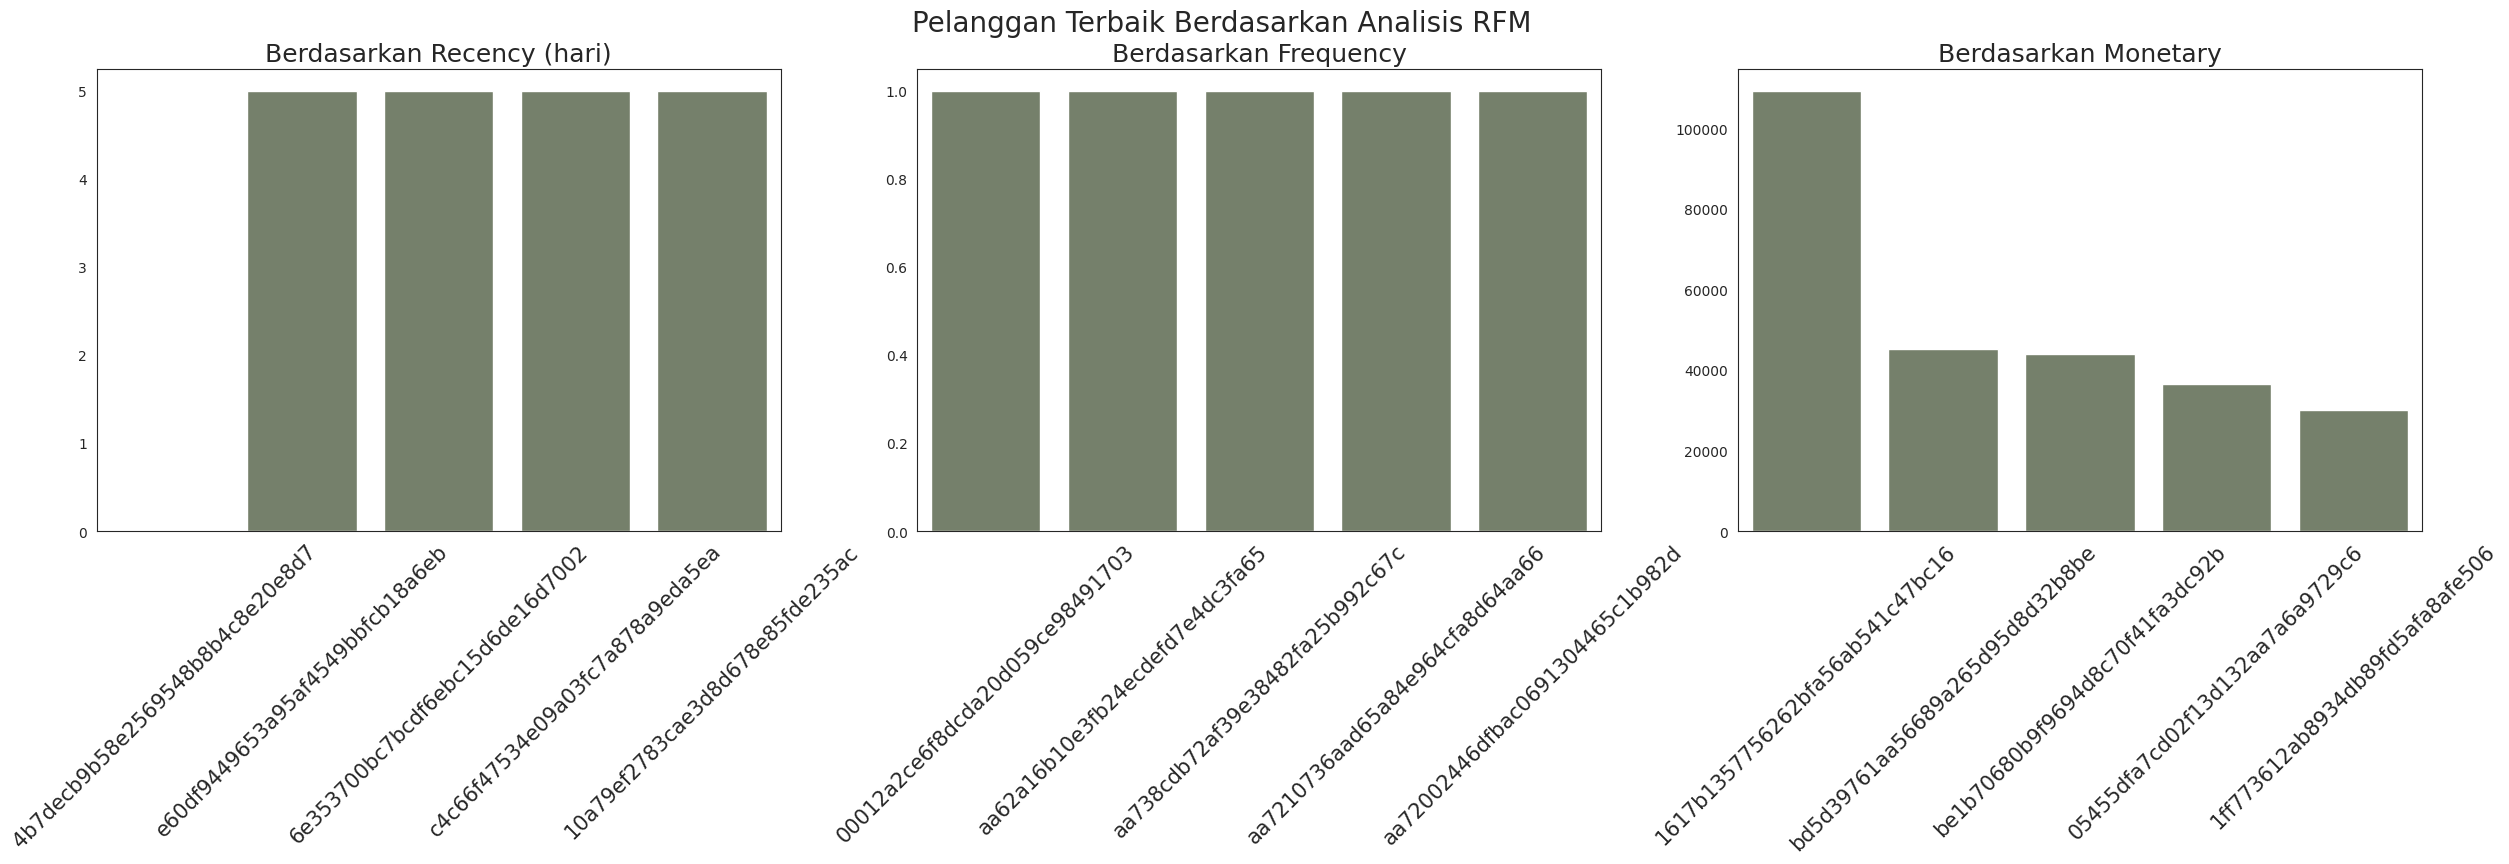

In [802]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#758467", "#758467", "#758467", "#758467", "#758467"]


# Berdasarkan Recency
sns.barplot(
    y="recency",
    x="customer_id",
    data=rfm.sort_values(by="recency", ascending=True).head(5),
    hue="customer_id",  # Menambahkan hue
    palette=colors,
    ax=ax[0],
    legend=False  # Mematikan legenda
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Recency (hari)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', rotation=45, labelsize=15)

# Berdasarkan Frequency
sns.barplot(
    y="frequency",
    x="customer_id",
    data=rfm.sort_values(by="frequency", ascending=False).head(5),
    hue="customer_id",  # Menambahkan hue
    palette=colors,
    ax=ax[1],
    legend=False  # Mematikan legenda
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', rotation=45, labelsize=15)

# Berdasarkan Monetary
sns.barplot(
    y="monetary",
    x="customer_id",
    data=rfm.sort_values(by="monetary", ascending=False).head(5),
    hue="customer_id",  # Menambahkan hue
    palette=colors,
    ax=ax[2],
    legend=False  # Mematikan legenda
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', rotation=45, labelsize=15)

plt.suptitle("Pelanggan Terbaik Berdasarkan Analisis RFM", fontsize=20)
plt.show()

Dari visualisasi data di atas,dapat diketahui adanya beberapa customer terbaik berdasarkan ketiga parameter tersebut. Pada grafik recency menunjukkan customer_id di sumbu horizontal dan jumlah hari sejak transaksi terakhir di sumbu vertikal, dimana terlihat customer melakukan transaksi tidak dalam rentang waktu yang lama atau tidak lebih dari lima hari sejak customer terakhir melakukan transaksi. Pada grafik frequency menunjukkan semua customer melakukan transaksi sebanyak satu kali dalam waktu beberapa bulan terakhir. Sedangkan, pada grafik monetary menunjukkan customer yang melakukan suatu transaksi paling banyak  dengan total menghabiskan lebih dari 100000.

### 3. Bagaimana penilaian (rating) yang diberikan oleh customers terhadap E-Commerce?

<ipython-input-803-fcdaded5db3d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=review_scores.index,


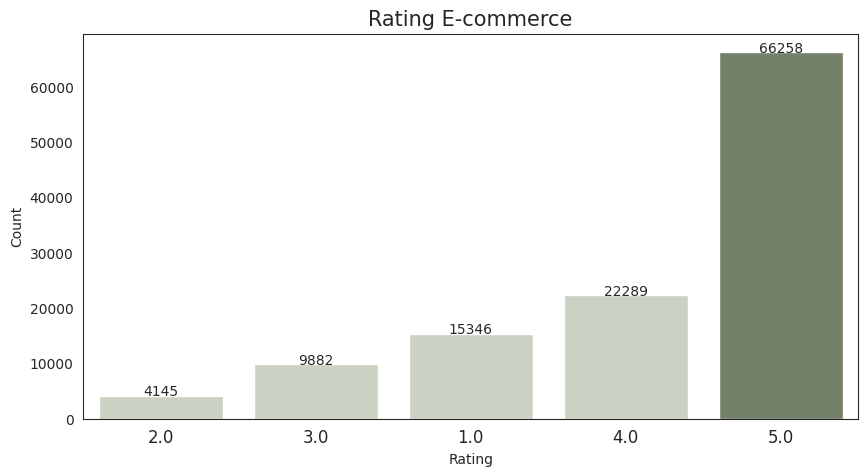

In [803]:
review_scores = all_data['review_score'].value_counts().sort_values(ascending=True)
most_common_score = review_scores.idxmax()

sns.set_style("white")

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=review_scores.index,
                 y=review_scores.values,
                 order=review_scores.index,
                 palette=["#758467" if score == most_common_score else "#CBD5C0" for score in review_scores.index]
                )

plt.title("Rating E-commerce", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10)

plt.show()

Dapat diketahui bahwa dari grafik diatas menunjukkan jumlah kategori rating penilaian paling banyak yaitu bintang 5 yang diberikan oleh para customer.

## Conclusion

- Berdasarkan pada hasil visualisasi data yang sudah didapatkan, dapat diketahui bahwa produk yang paling banyak terjual yaitu bed_bath_table dengan terjual sebanyak 12.000 buah. Sedangkan produk yang paling sedikit terjual yaitu security_and-service dengan terjual sebanyak 2 buah.

- Berdasarkan hasil visualisasi yang telah didapatkan dengan menggunakan RFM Analysis, diketahui bahwa grafik recency menunjukkan customer melakukan transaksi tidak dalam rentang waktu yang lama atau tidak lebih dari lima hari sejak customer terakhir melakukan transaksi.

- Dari hasil visualisasi dengan menggunakan RFM Analysis, diketahui bahwa pada grafik frequency menunjukkan semua customer melakukan transaksi sebanyak satu kali dalam waktu beberapa bulan terakhir.Ini menandakan customer sering melakukan transaksi dalam periode waktu tertentu.

- Berdasarkan hasil visualisasi dengan menggunakan RFM Analysis, pada grafik monetary menunjukkan customer yang melakukan suatu transaksi paling banyak dengan total menghabiskan lebih dari 100000.

-  Dari hasil visualisasi yang telah didapatkan, terlihat bahwa mayoritas customer memberikan rating dengan bintang 5. Sehingga menunjukkan bahwa mayoritas customer puas terhadap penjualan produk yang ada pada E-Commerce.